# Hydogenic atoms
### by Randhal Ramirez (randhal45@gmail.com)

# Calculating the wavefunction of any hydrogenic atom:

## $-\frac{\hbar}{2 \mu} \nabla^2 \psi_{nlm} - \frac{Ze^2}{4\pi \epsilon_0 r} \psi_{nlm} = E_n \psi_{nlm}$

## Solving this Differential Equation:

## $\psi_{nlm}=c_1 \exp \left[ \sqrt{-\frac{\hbar}{2 \mu E_n}-\frac{Ze^2}{4 \pi \epsilon_0 r E_n}} \right]+c_2 \exp \left[ -\sqrt{-\frac{\hbar}{2 \mu E_n}-\frac{Ze^2}{4 \pi \epsilon_0 r E_n}} \right]$

# For especific n,l,m values this equation is often used:

## $\psi_{nlm}=R_{nl}(r) \times Y_m^l(\theta,\phi)$

## $R_{nl}(r) = \left[ \frac{(n-l-1)!}{2n(n+l)!} \right]^\frac{1}{2} \left( \frac{2}{an} \right)^\frac{3}{2}x^l e^{-\frac{x}{2}} L_{n-l-1}^{2l+1}(x)$

## $Y_{lm}(\theta,\phi)=(-1)^m \left[ \frac{2l+1}{4 \pi} \frac{(l-m)!}{(l+m)!} \right]^\frac{1}{2} P_l^m(cos \theta) e^{im \phi}$

## $L_{n-l-1}^{2l+1}(x)= \displaystyle \sum_{k=0}^{n-l-1} \frac{ (l+n)! (-x)^k }{ (2l+1+k)! (n-l-1-k)! k!}$

## $P_l^{-m}(x)=(-1)^m\frac{(l-m)!}{(l+m)!} P_l^m(x)$

## $P_l^m(x)=(1-x^2)^\frac{m}{2} \frac{d^m}{dx^m} P_l(x)$ for $l \geq m \geq 0$

## $P_l(x)=\frac{1}{2^l \cdot l!} \frac{d^l}{dx^l}(x^2-1)^l$ 

## $x=\frac{2r}{na}$

## $a=\frac{m_e}{\mu} \frac{a_0}{Z} \approx \frac{a_0}{Z}$

## $\mu=\frac{m_e m_Z}{m_e + m_Z}$

In [1]:
from sympy import Sum, oo, symbols, cos, Indexed, lambdify, diff, pi, factorial, exp, plot, integrate
import numpy as np
import scipy.constants as kn
from scipy.constants import physical_constants as pkn 
from scipy.constants import find # Just for find constants info at: scipy.org/scipy.constants.find
import matplotlib.pyplot as plt 

In [2]:
# Input by user 
'''
#Z=input('Enter Z: ')
N=int(input('Enter n: '))
L=int(input('Enter l: '))
M=int(input('Enter m: '))
Theta=int(input('Enter zenith angle: '))
Phi=int(input('Enter azimuth angle: '))
R=int(input('Enter r: '))
#print(Z,n,l,m)
'''

"\n#Z=input('Enter Z: ')\nN=int(input('Enter n: '))\nL=int(input('Enter l: '))\nM=int(input('Enter m: '))\nTheta=int(input('Enter zenith angle: '))\nPhi=int(input('Enter azimuth angle: '))\nR=int(input('Enter r: '))\n#print(Z,n,l,m)\n"

In [52]:
# Definitions level 1

a0=pkn['Bohr radius'][0] # Bohr radius

a, r, theta, phi, x, k, psi = symbols('a r theta phi x k psi')

# Definitions level 2

# Creating P_l(x)  corresponding to Legendre Polynomials in the Rodrigues' form 
def Plx(l,x):
    return 1/(2**l*factorial(l))*diff((x**2-1)**l,x,l)

# Tested with page 47 of the Cambridge formulas book # It works

# Creating P_l^m(x) corresponding to Associated Legendre functions
def Plmx_possitive_part(l,m,x,theta):
    return ((-1)**m*(1-x**2)**(m/2)*diff(Plx(l,x),x,m)).subs(x,cos(theta))

def Plmx(l,m,x,theta):
    if m>=0:
        return Plmx_possitive_part(l,m,x,theta)
    if m<0:
        return (-1)**m*Plmx_possitive_part(l,abs(m),x,theta)

# Tested with page 48 of the Cambridge formulas book # It works

# Creating L_a^b corresponding to Laguerre polynomials
def Lab(n,l):
    return Sum(factorial(l+n)*(-x)**k/(factorial(2*l+1+k)),(k,0,n-l-1)).doit()

In [58]:
Lab(3,0)

x**2 - 3*x + 6

In [60]:
# Definitions level 3 

# Creating Y_l^m(theta,phi), corresponding to the total angular contribution in the wavefunction
def Ylm_theta_phi(l,m,x,theta,phi):
    return ((2*l+1)/(4*pi)*factorial(l-abs(m))/factorial(l+abs(m)))**(1/2)*Plmx(l,m,x,theta)*exp(1j*m*phi)

# Tested with page 49 of the Cambridge formulas book # It works

# Creating R_{nl}(r), being the total radial contribution in the wavefunction
def Rnlr(n,l,x):
    return (factorial(n-l-1)/(2*n*factorial(n+l)))**(1/2)*(2/(a*n))**(3/2)*x**l*exp(-x/2)*Lab(n,l)

# Tested using pages 49 and 96 and extracting the product # It works 

# Definitions level 4 

# The next function correspond to the whole wavefunction 
def psi_nlm_theta_phi(n,l,m,x,theta,phi):
    return Rnlr(n,l,x).subs(x,2*r/(n*a))*Ylm_theta_phi(l,m,x,theta,phi)

def Psi(n,l,m):
    return psi_nlm_theta_phi(n,l,m,x,theta,phi)

# Tested with page 96 of the Cambridge formulas book # It works 
### Issue 1: Fails for n=3 corrected ver 0.0.1

In [57]:
Lab(3,0)

x**2 - 3*x + 6

In [61]:
psi_1=r*Psi(4,0,0)
psi=lambdify([r,a],psi_1,'numpy')
psi_1

0.03125*pi**(-0.5)*r*(24 - 6*r/a + r**2/a**2 - r**3/(8*a**3))*(1/a)**1.5*exp(-r/(4*a))

In [64]:
rx=np.linspace(0,a0*100,1000)
psi_y=psi(rx,aa)

(0.0, 57494827656.26133)

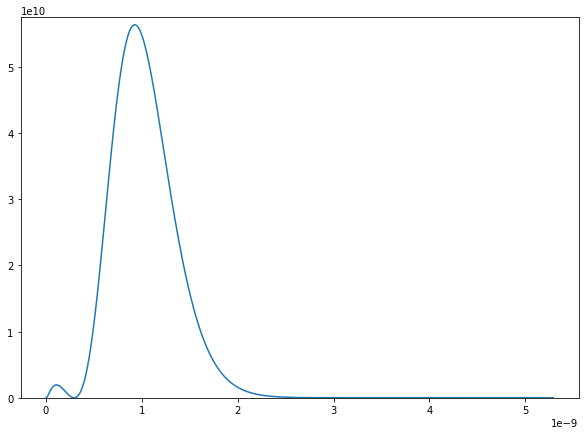

In [65]:
fig=plt.figure(figsize=[10,7])
ax=fig.gca()
#ax.plot(rx,psi_y)
ax.plot(rx,psi_y**2)
plt.ylim(0,max(psi_y**2)*1.02)

In [26]:
np.max(psi_y**2)

287176787.08936214